# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

In [2]:
data = pd.read_csv('orange_small_churn_data.train')
labels = pd.read_csv('orange_small_churn_labels.train', header=None, names=['churn'])

In [3]:
real_data = data.iloc[:, :190]
cat_data = data.iloc[:,191:]

In [4]:
# Удалим столбцы, в которых количество не-NaN элементов меньше 2000 (менее 5%) - они неинформативны. 
real_data.dropna(axis=1, thresh=2000, inplace=True)
cat_data.dropna(axis=1, thresh=2000, inplace=True)

# Заполним пропуски в вещественных признаках средними, а в категориальных - новым значением 'NA'
real_data.fillna(real_data.mean(), inplace=True)
cat_data.fillna('NA', axis=1, inplace=True)

In [5]:
real_data.head()

Var6      Var7        Var13  Var21  Var22  Var24  Var25   Var28  Var35  \
0  3052.0  6.792126  1244.979978  480.0  600.0   20.0  480.0  200.00    0.0   
1  1813.0  7.000000   636.000000  212.0  265.0    2.0  128.0  166.56    0.0   
2  1953.0  7.000000   448.000000  176.0  220.0    0.0   72.0  311.76    0.0   
3  1533.0  7.000000     4.000000  332.0  415.0    0.0  144.0  220.08    5.0   
4   686.0  7.000000     0.000000  160.0  200.0    2.0   48.0  278.00    0.0   

       Var38     ...           Var140  Var143  Var144    Var149      Var153  \
0    82752.0     ...      1379.299072     0.0     9.0  389396.0   2313888.0   
1  2706120.0     ...       205.000000     0.0    18.0     735.0   6502680.0   
2  4698780.0     ...       400.000000     0.0    27.0       0.0  10569040.0   
3   864384.0     ...         5.000000     0.0     0.0       0.0   9676200.0   
4  4364880.0     ...       225.000000     0.0     9.0  554414.0  10535200.0   

   Var160     Var163  Var173  Var181      Var189  
0    28.0   599532.0     0.0     0.0  270.585523  
1    14.0   364182.0     0.0     0.0  276.000000  
2    18.0        0.0     0.0     0.0  270.585523  
3   108.0   253284.0     0.0     0.0  270.585523  
4    24.0  2851284.0     0.0     0.0  270.585523  

[5 rows x 43 columns]

In [6]:
cat_data.head()

Var192            Var193 Var194 Var195 Var196 Var197   Var198  \
0  NESt0G8EIb           AERks4l     NA   taul   1K8T   0LaQ  UaKK0yW   
1  P1WvyxLp3Z           2Knk1KF     NA   taul   1K8T   YFAj  Bnunsla   
2  FoxgUHSK8h  LrdZy8QqgUfkVShG     NA   taul   1K8T   TyGl  fhk21Ss   
3  vNEvyxLp3Z              RO12     NA   taul   1K8T   0Xwj  uoZk2Zj   
4  4e7gUH7IEC              RO12     NA   taul   1K8T   vSNn  kugYdIL   

       Var199   Var200 Var201  ...   Var219   Var220   Var221   Var222  \
0  I1sFbv_0IT       NA     NA  ...     FzaX  hLKtJ9p  Al6ZaUT  vr93T2a   
1     o64y9zI  DlISMzi     NA  ...     FzaX  hN8KpA1     oslk  6hQ9lNX   
2  nQUveAzAF7       NA     NA  ...     FzaX  4UxGlow     zCkv  catzS2D   
3  LWyxgtXeJL       NA     NA  ...     FzaX  ylCK5YS     oslk  e4lqvY0   
4  ZIXKpoNpqq       NA     NA  ...     FzaX  PYpzAu9     oslk  MAz3HNj   

       Var223 Var225 Var226   Var227         Var228 Var229  
0  LM8l689qOp     NA   fKCe  02N6s8f  xwM2aC7IdeMC0     NA  
1  LM8l689qOp   ELof   xb3V     RAYp        55YFVY9   mj86  
2  LM8l689qOp     NA   FSa2     ZI9m  ib5G6X1eUxUn6   mj86  
3  LM8l689qOp     NA   xb3V     RAYp  F2FyR07IdsN7I     NA  
4  LM8l689qOp     NA   WqMG     RAYp  F2FyR07IdsN7I     NA  

[5 rows x 34 columns]

Половина признаков ушло, но в плане информации мы почти ничего не потеряли.

2\. Рассчитайте доли классов `отток` и `не отток`.

In [7]:
nochurn_share = labels.churn.value_counts()[-1] / labels.shape[0] 
churn_share = labels.churn.value_counts()[1] / labels.shape[0]

print('Доля класса отток составляет {}%, а доля класса не отток составляет {}%'.format(round(churn_share * 100, 2), 
                                                                                       nochurn_share * 100))

Доля класса отток составляет 7.44%, а доля класса не отток составляет 92.56%


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

In [8]:
indices1 = labels[labels['churn'] == 1].index
indices0 = labels[labels['churn'] == -1].index

In [9]:
# Корреляция бинарной переменной с вещественной считается так: E(X1 | X2 = 1) - E(X1 | X2 = -1)
real_corr_df = np.abs(real_data.loc[indices1].mean() - real_data.loc[indices0].mean())
real_corr_df.head()

Var6     189.837111
Var7       1.569160
Var13    444.064631
Var21     15.166168
Var22     18.766947
dtype: float64

In [10]:
print('Корреляция самых "сильных" вещественных признаков\n', real_corr_df.sort_values(ascending=False)[:5])
print('\n Корреляция самых "слабых" вещественных признаков\n', real_corr_df.sort_values()[:5])

Корреляция самых "сильных" вещественных признаков
 Var113    162842.184538
Var153    141460.231970
Var38      72546.153904
Var76      53034.206524
Var149     25531.152756
dtype: float64

 Корреляция самых "слабых" вещественных признаков
 Var44     0.003037
Var173    0.004751
Var181    0.019584
Var143    0.023683
Var57     0.026665
dtype: float64


Таким образом, мы рассчитали корреляции всех признаков с целевой переменной. Видим, что есть вещественные признаки с относительно сильной корреляцией.

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [11]:
# Выделим топ-20
top20 = real_corr_df.sort_values(ascending=False).head(20)
top_feats = top20.index

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Строим распределения в разрезе классов
fig, axes = plt.subplots(4, 5, figsize=(20, 20))
for i in range(len(top_feats)):
    ax = axes[i // 5, i % 5]
    ax.scatter(y=real_data[top_feats[i]], x=labels.churn);
    ax.set_title(top_feats[i])
    

Wall time: 3min 53s


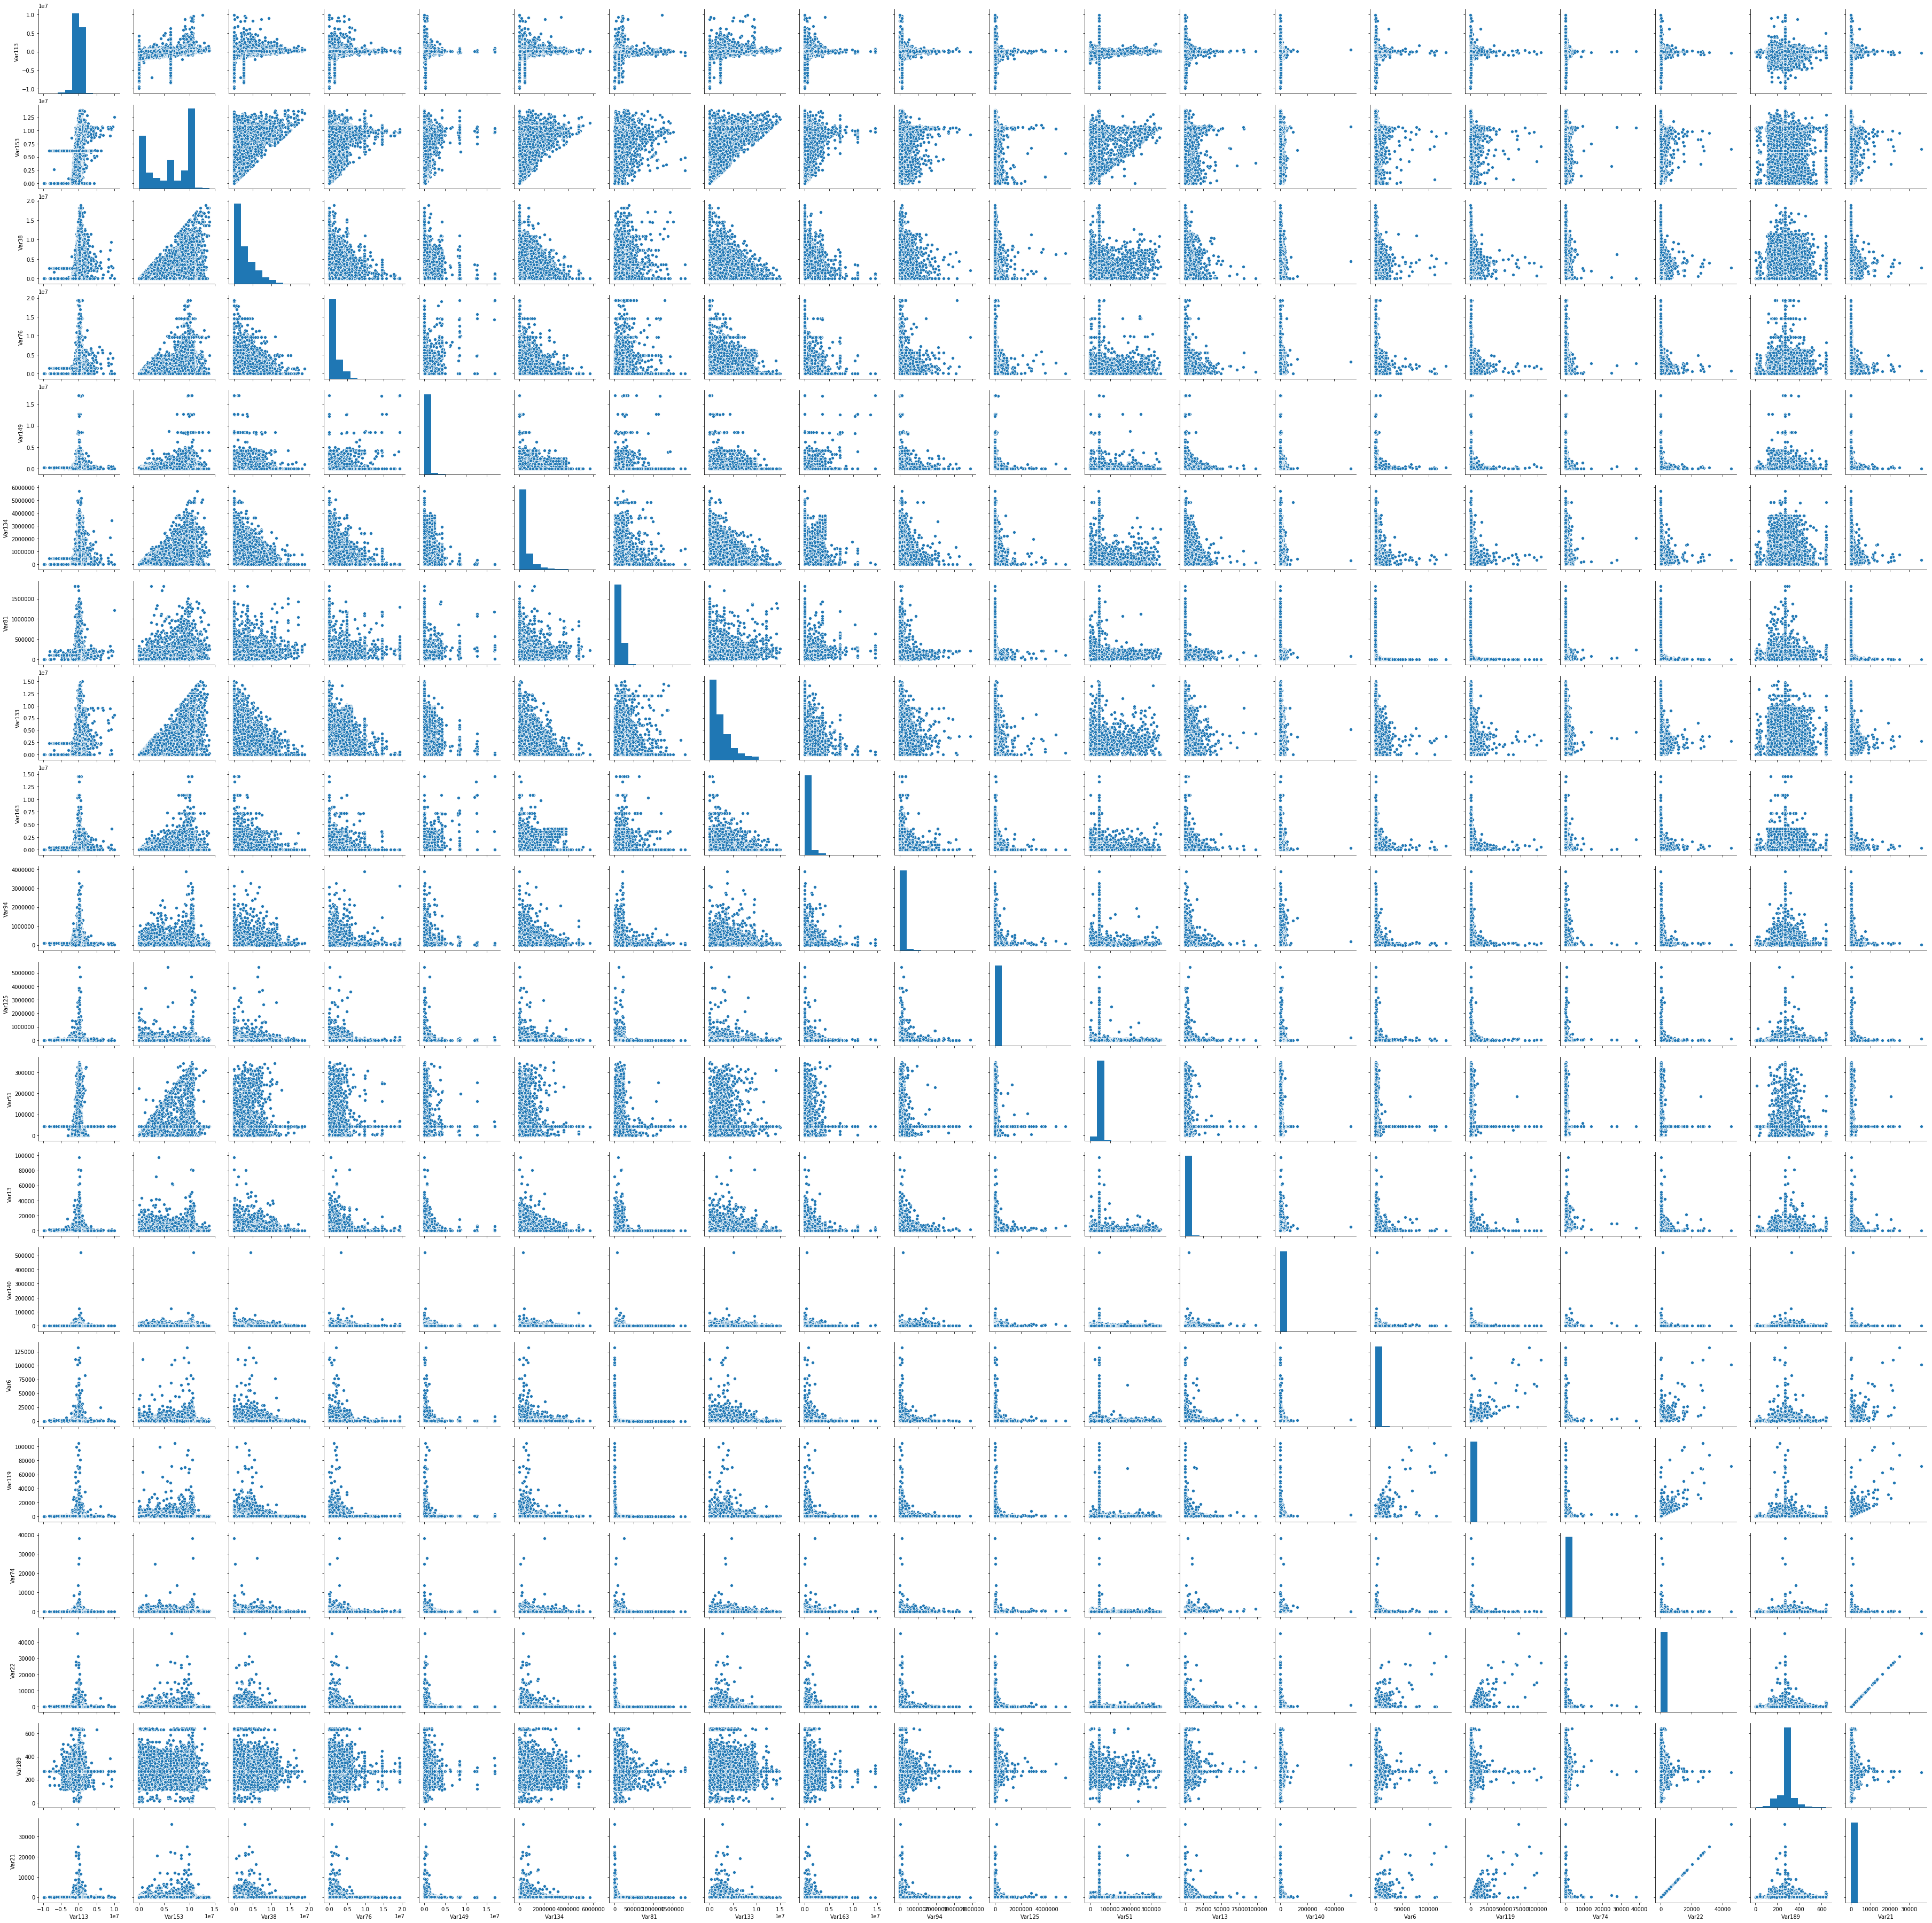

In [13]:
%%time
sns.pairplot(real_data[top_feats]);

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

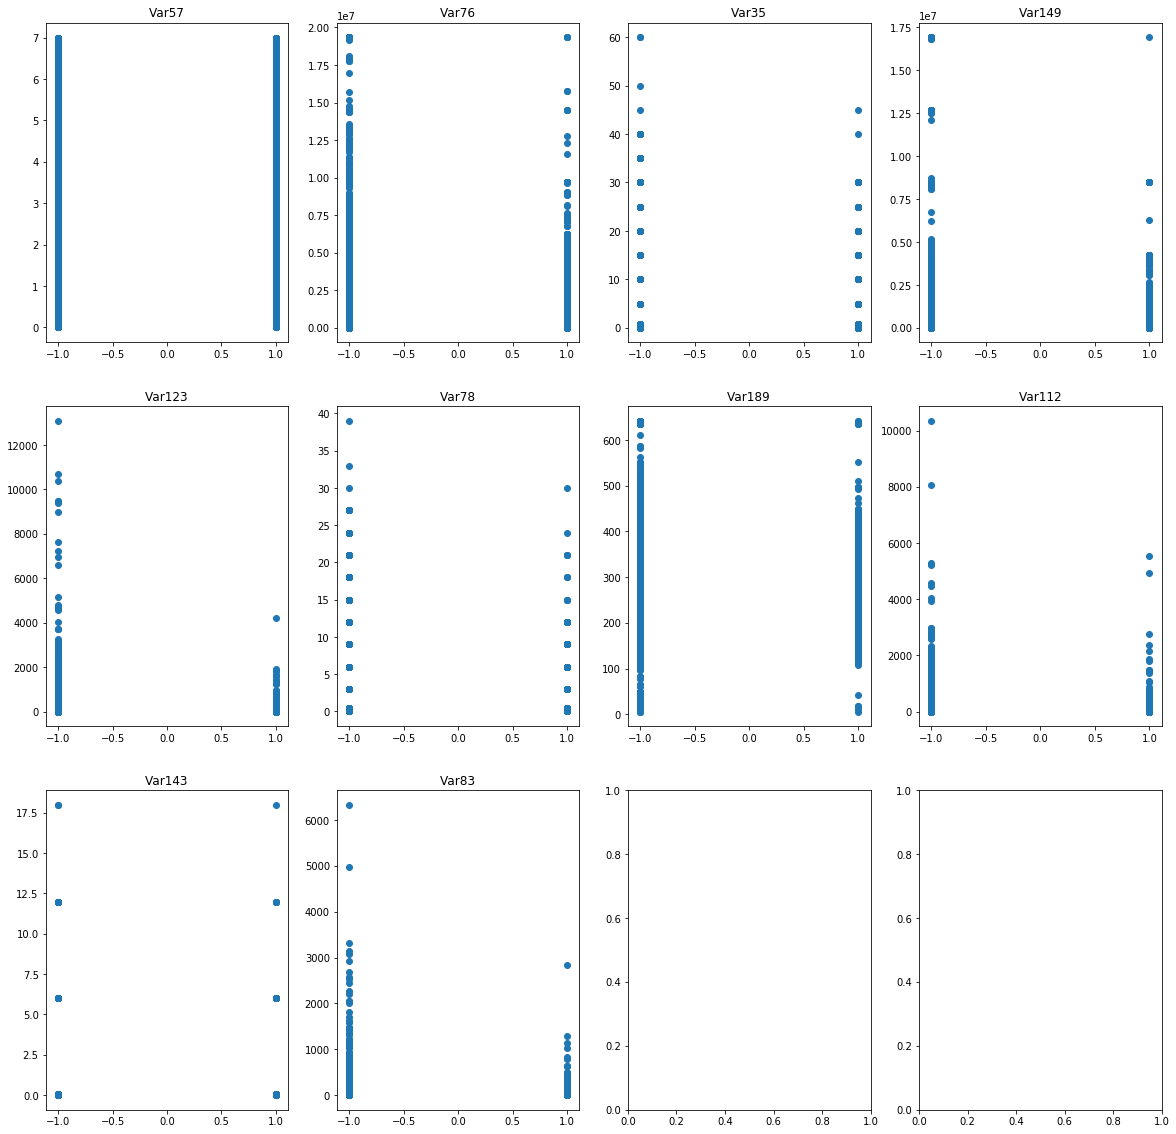

In [14]:
import random

random.seed(1066)
random10 = random.sample(set(real_corr_df.index), 10)

# Строим распределения в разрезе классов
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
for i in range(len(random10)):
    ax = axes[i // 4, i % 4]
    ax.scatter(y=real_data[random10[i]], x=labels.churn);
    ax.set_title(random10[i])

C:\Code\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Code\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Code\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Code\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Wall time: 2min


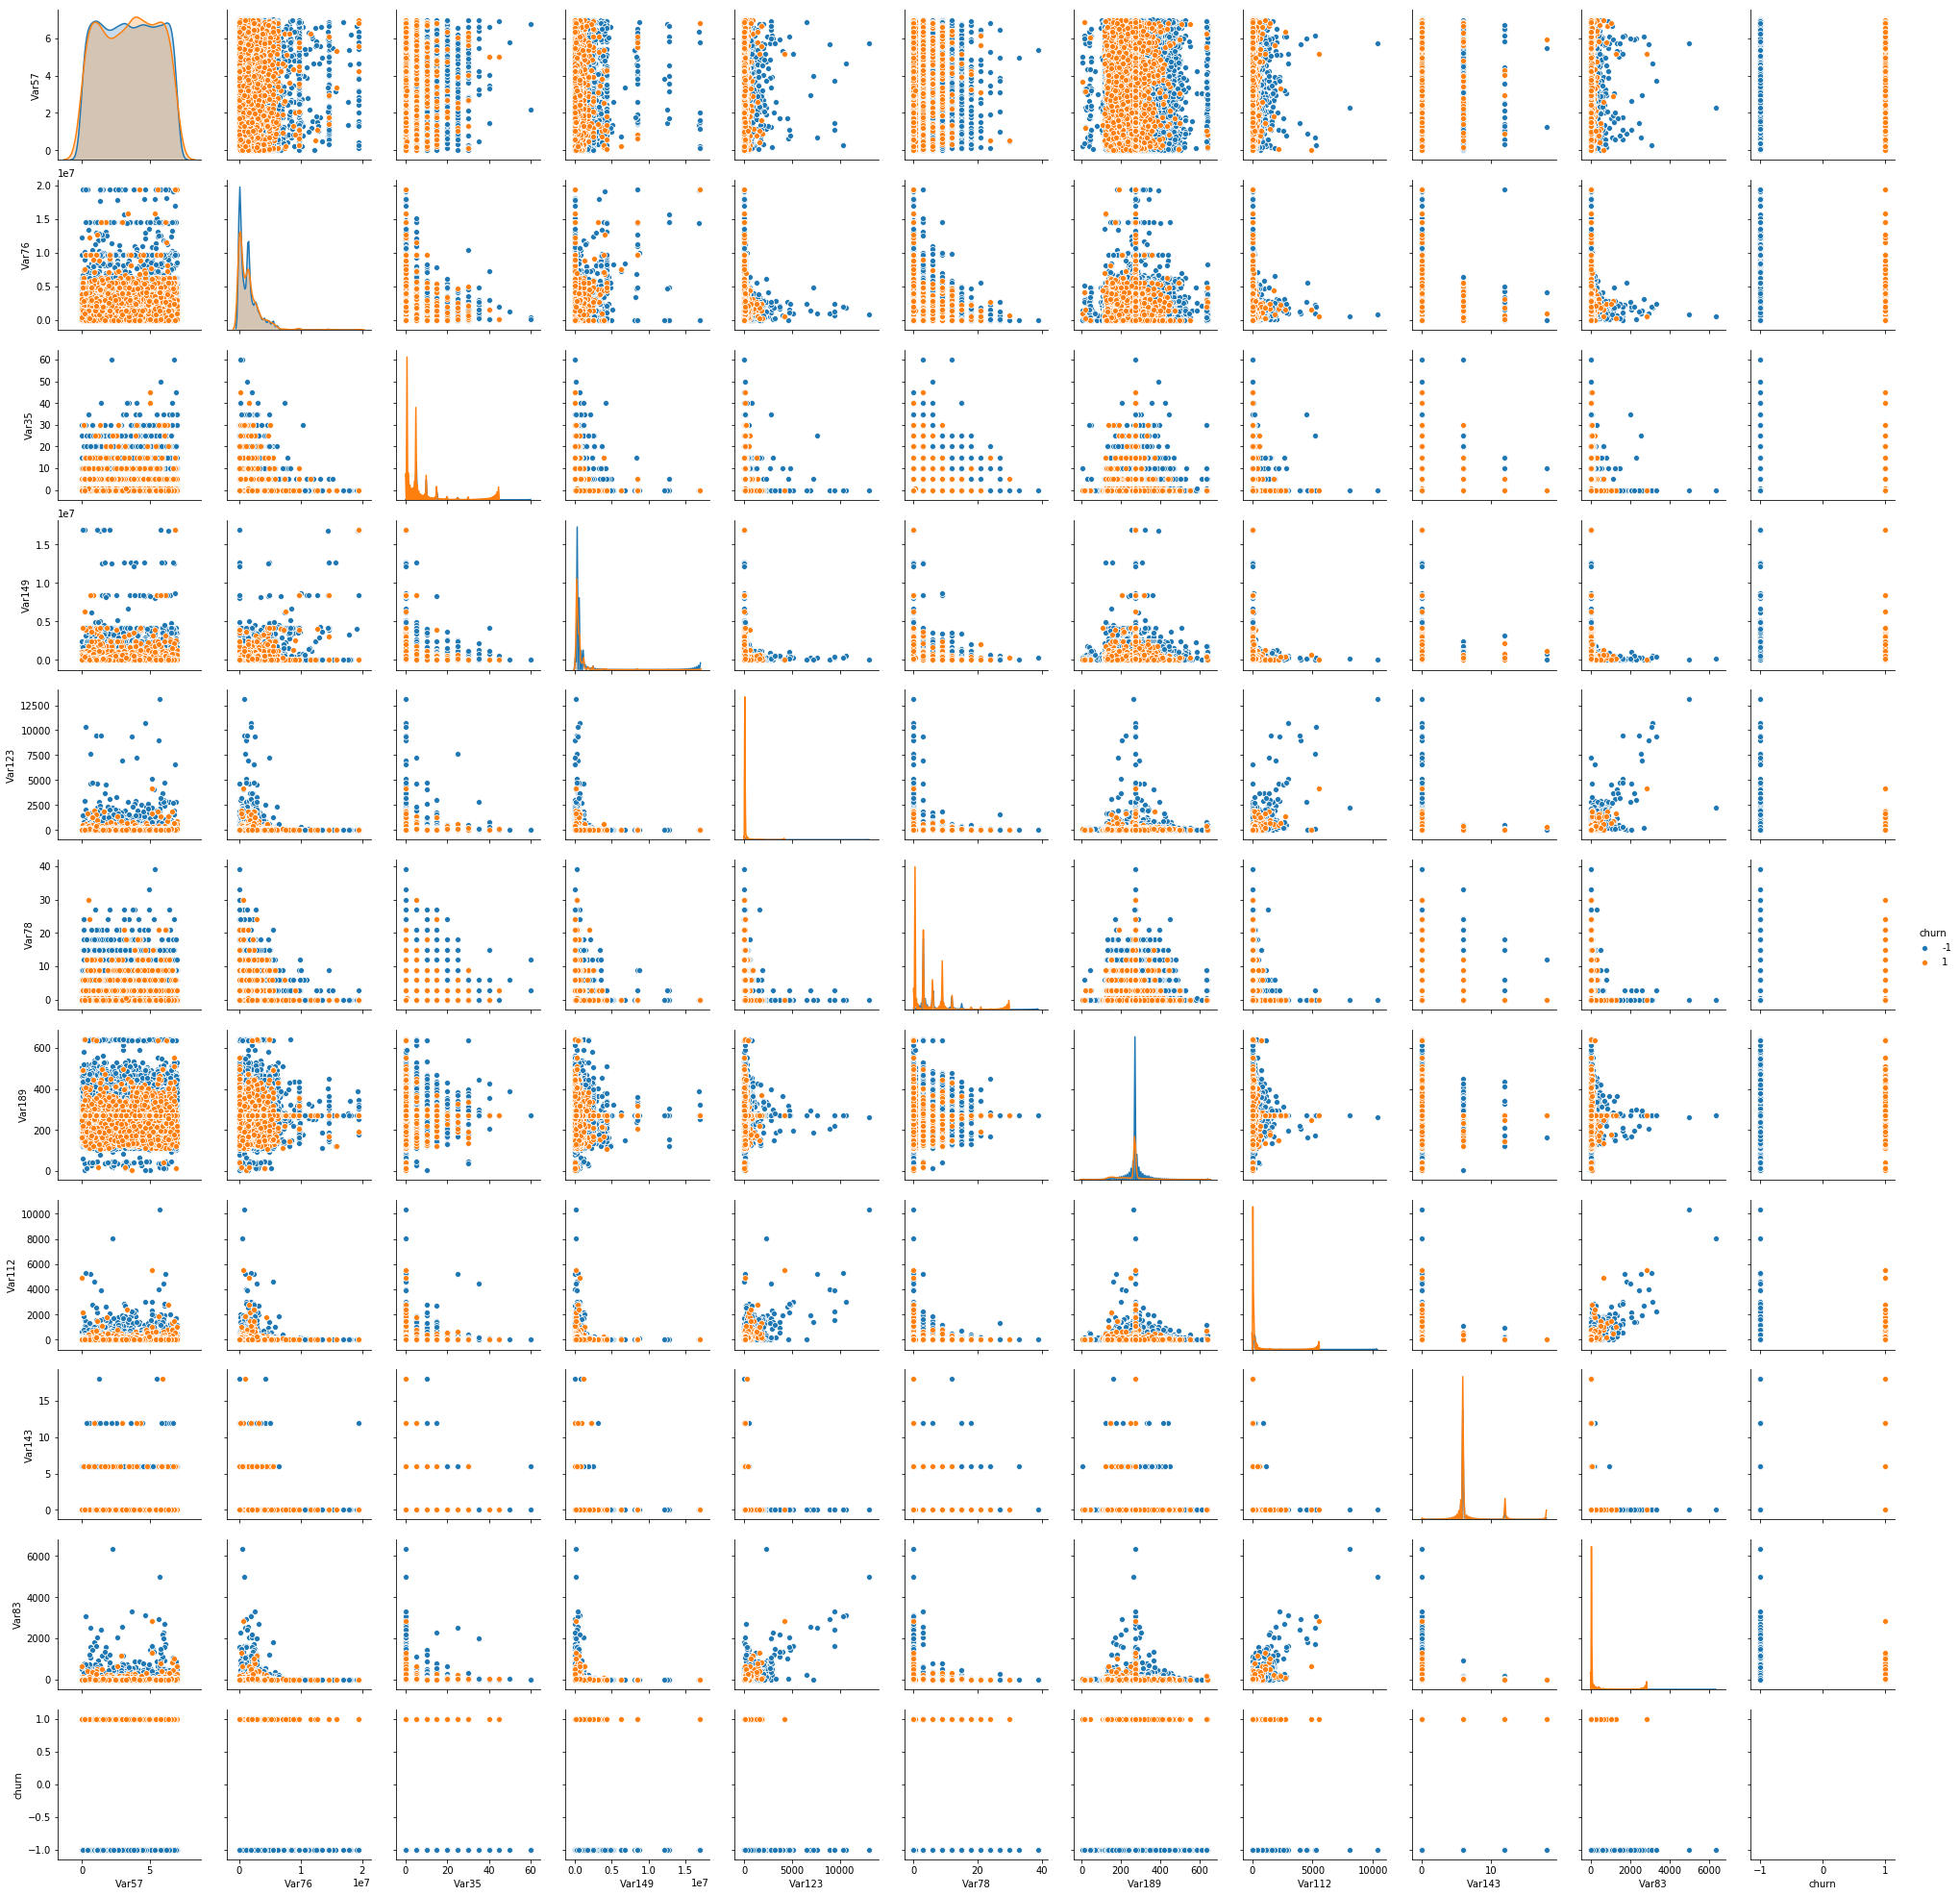

In [15]:
%%time
sns.pairplot(pd.concat((real_data[random10], labels['churn']), axis=1), hue='churn');

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

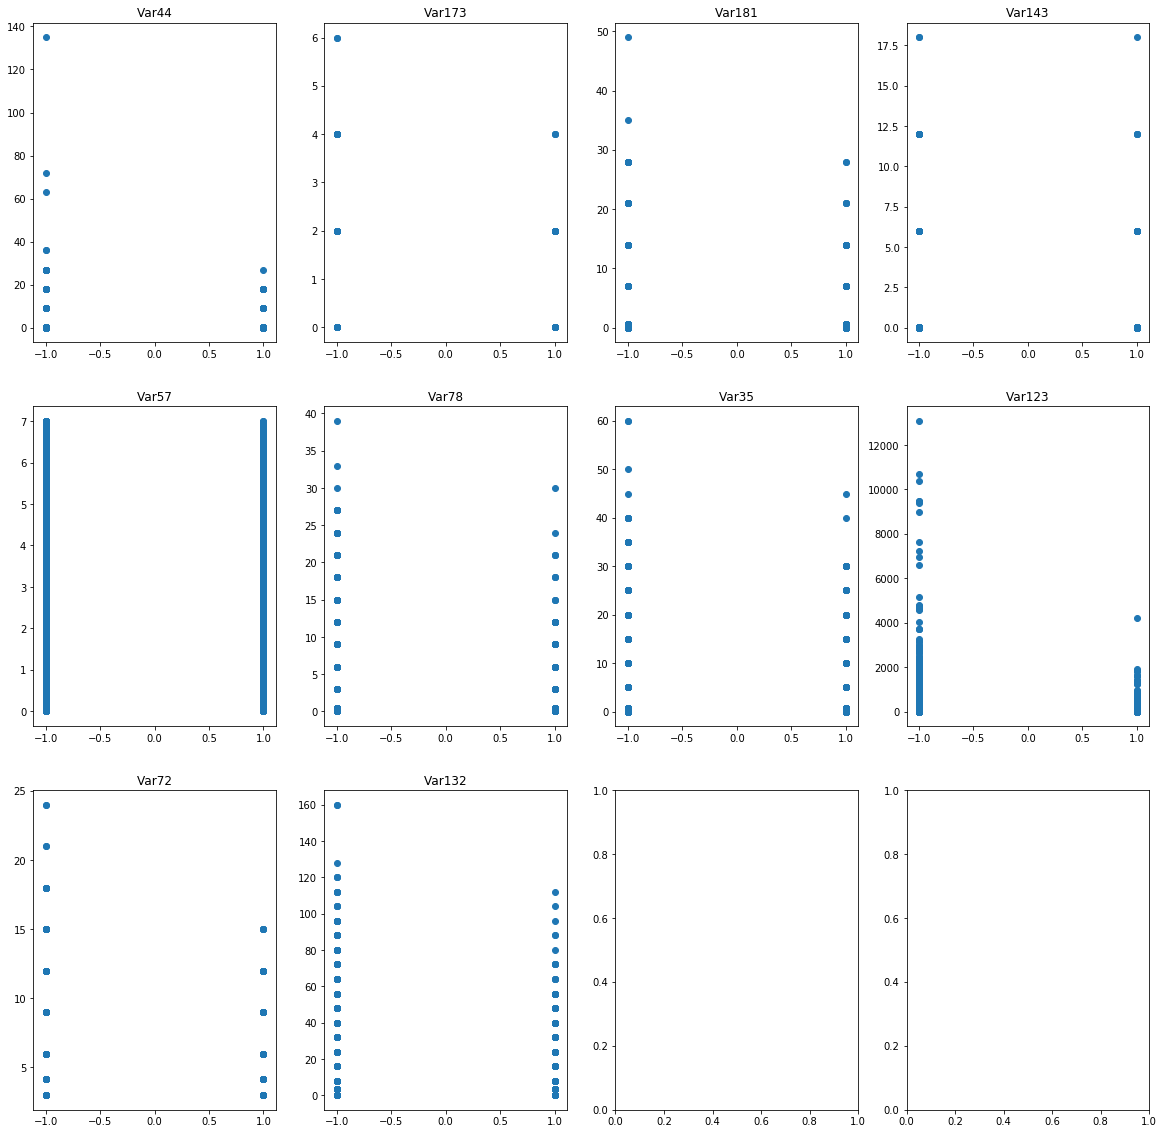

In [16]:
weak10 = real_corr_df.sort_values(ascending=True).head(10)
weak_feats = list(weak10.index)

fig, axes = plt.subplots(3, 4, figsize=(20, 20))
for i in range(len(weak_feats)):
    ax = axes[i // 4, i % 4]
    ax.scatter(x=labels.churn, y=real_data[weak_feats[i]])
    ax.set_title(weak_feats[i])

C:\Code\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Code\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Code\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Code\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


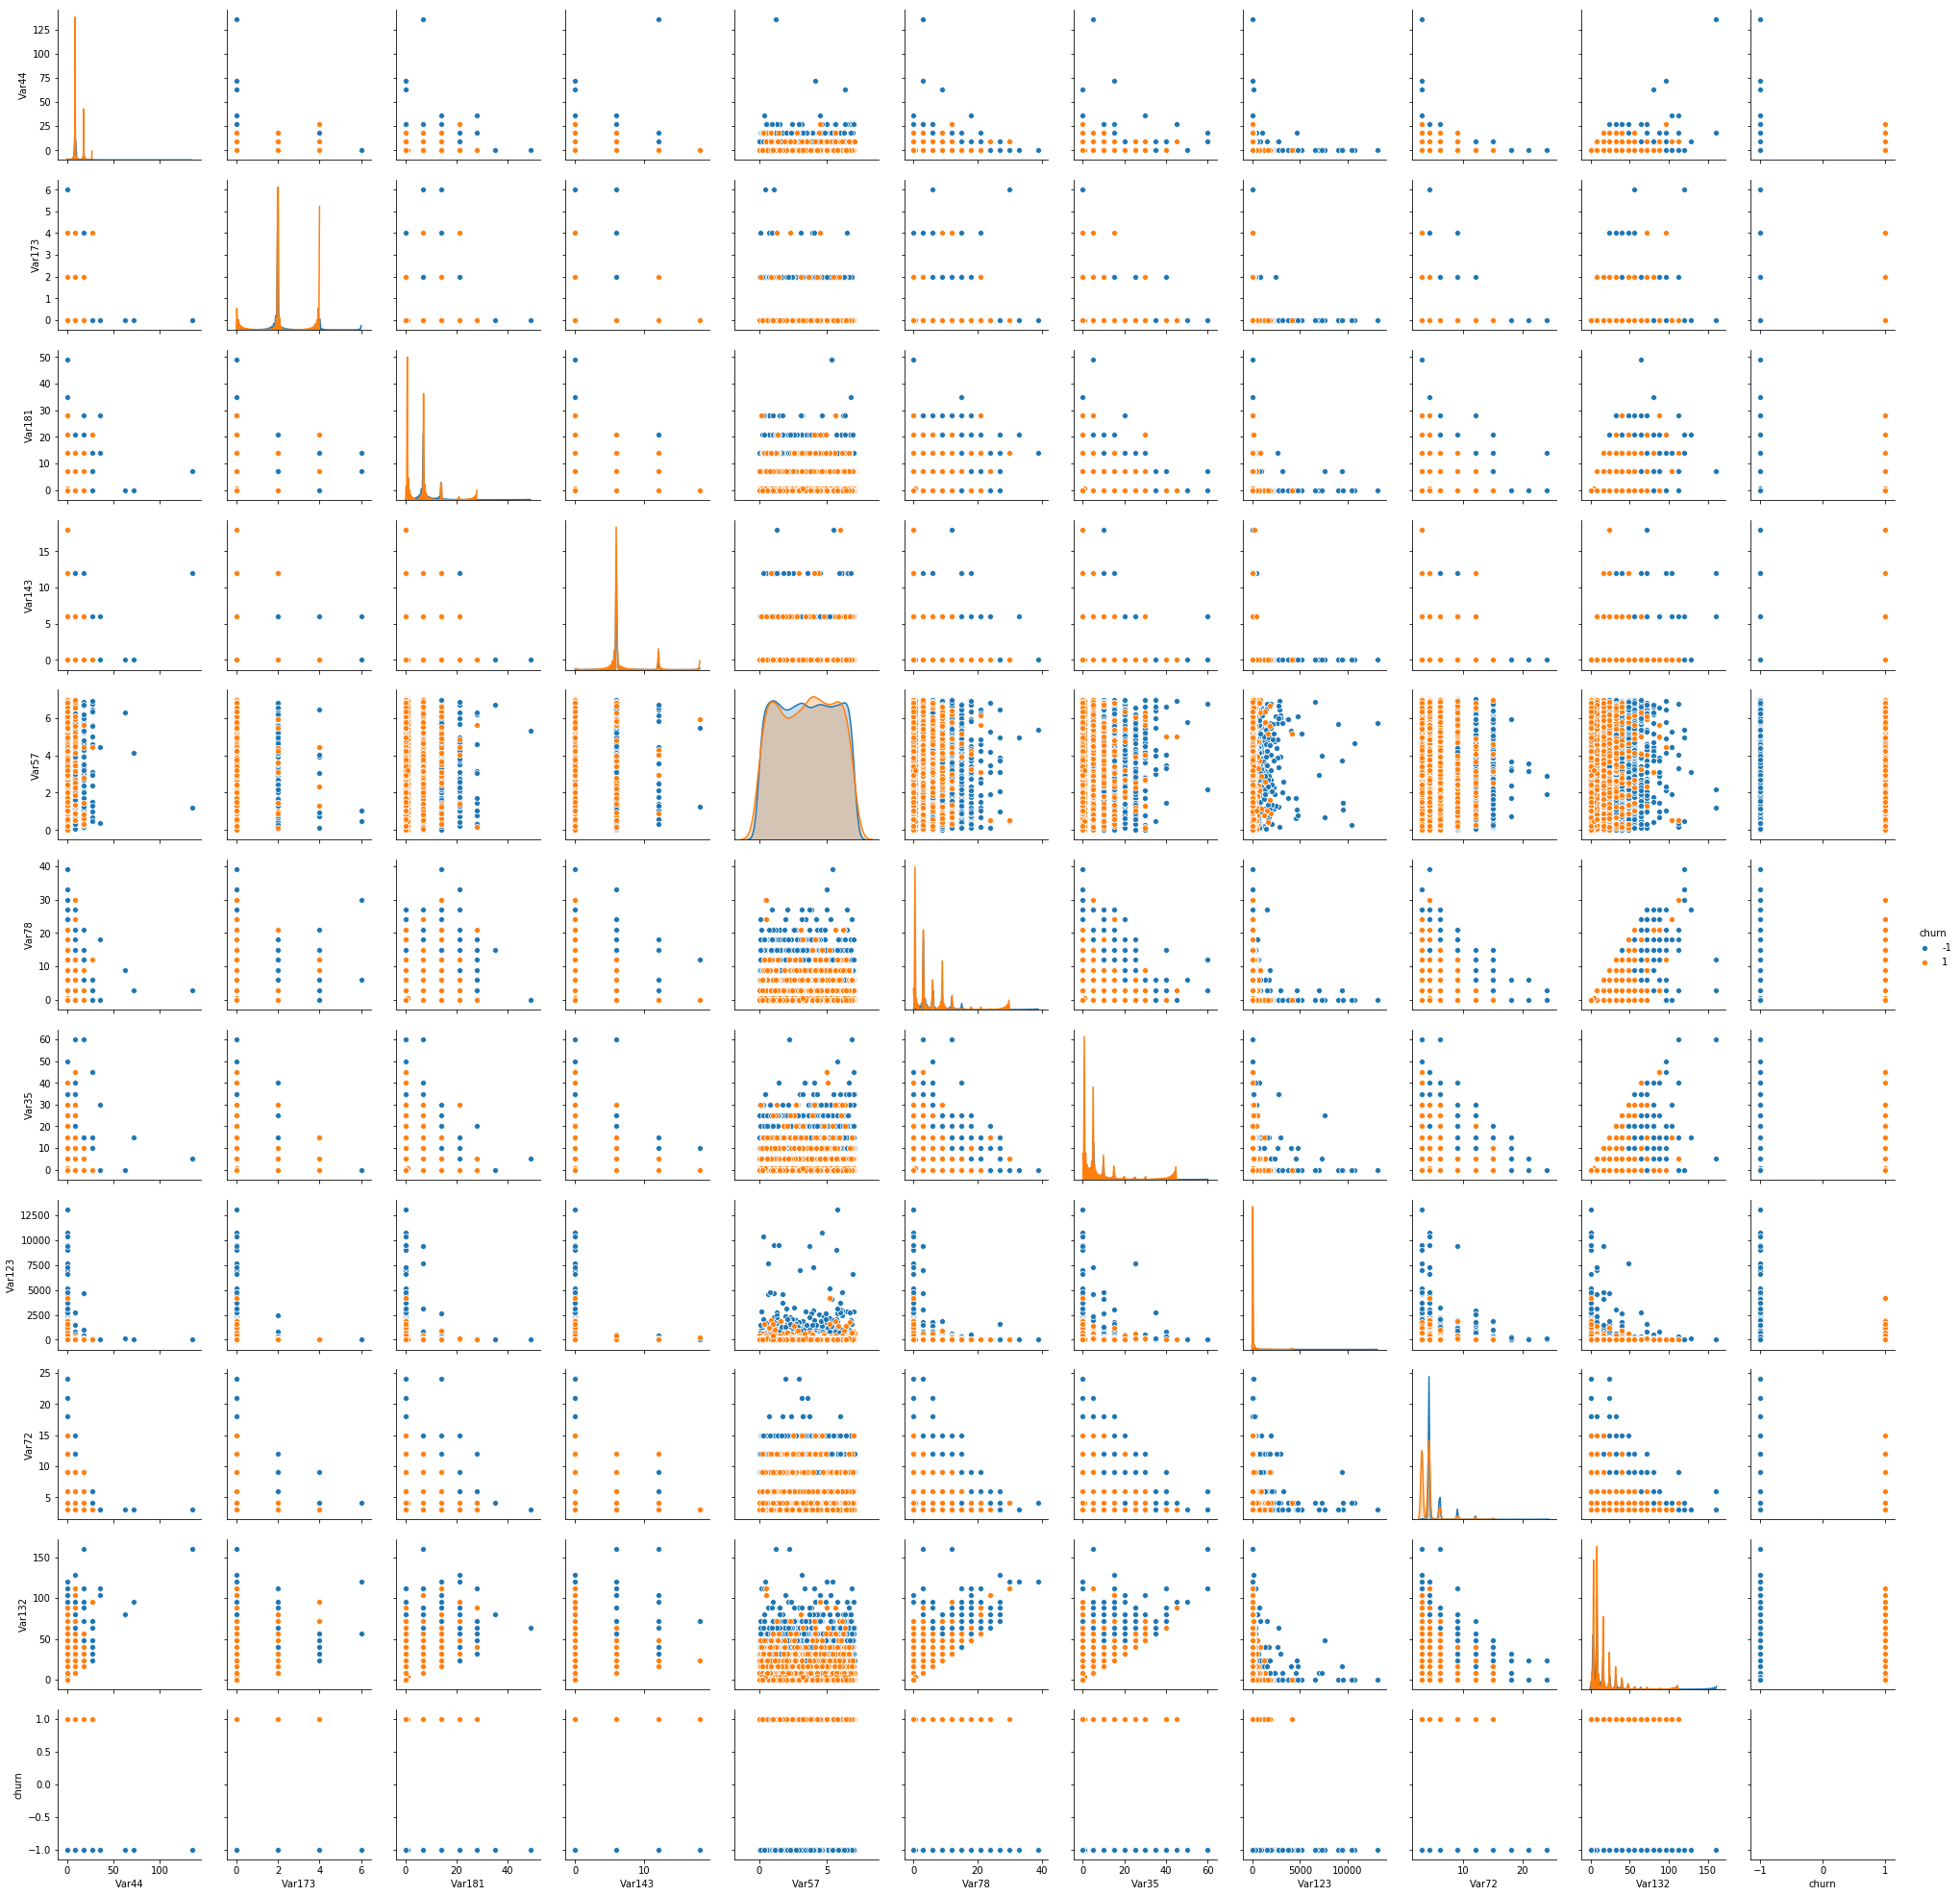

In [17]:
sns.pairplot(pd.concat((real_data[weak_feats], labels['churn']), axis=1), hue='churn');

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

Wall time: 5min 35s


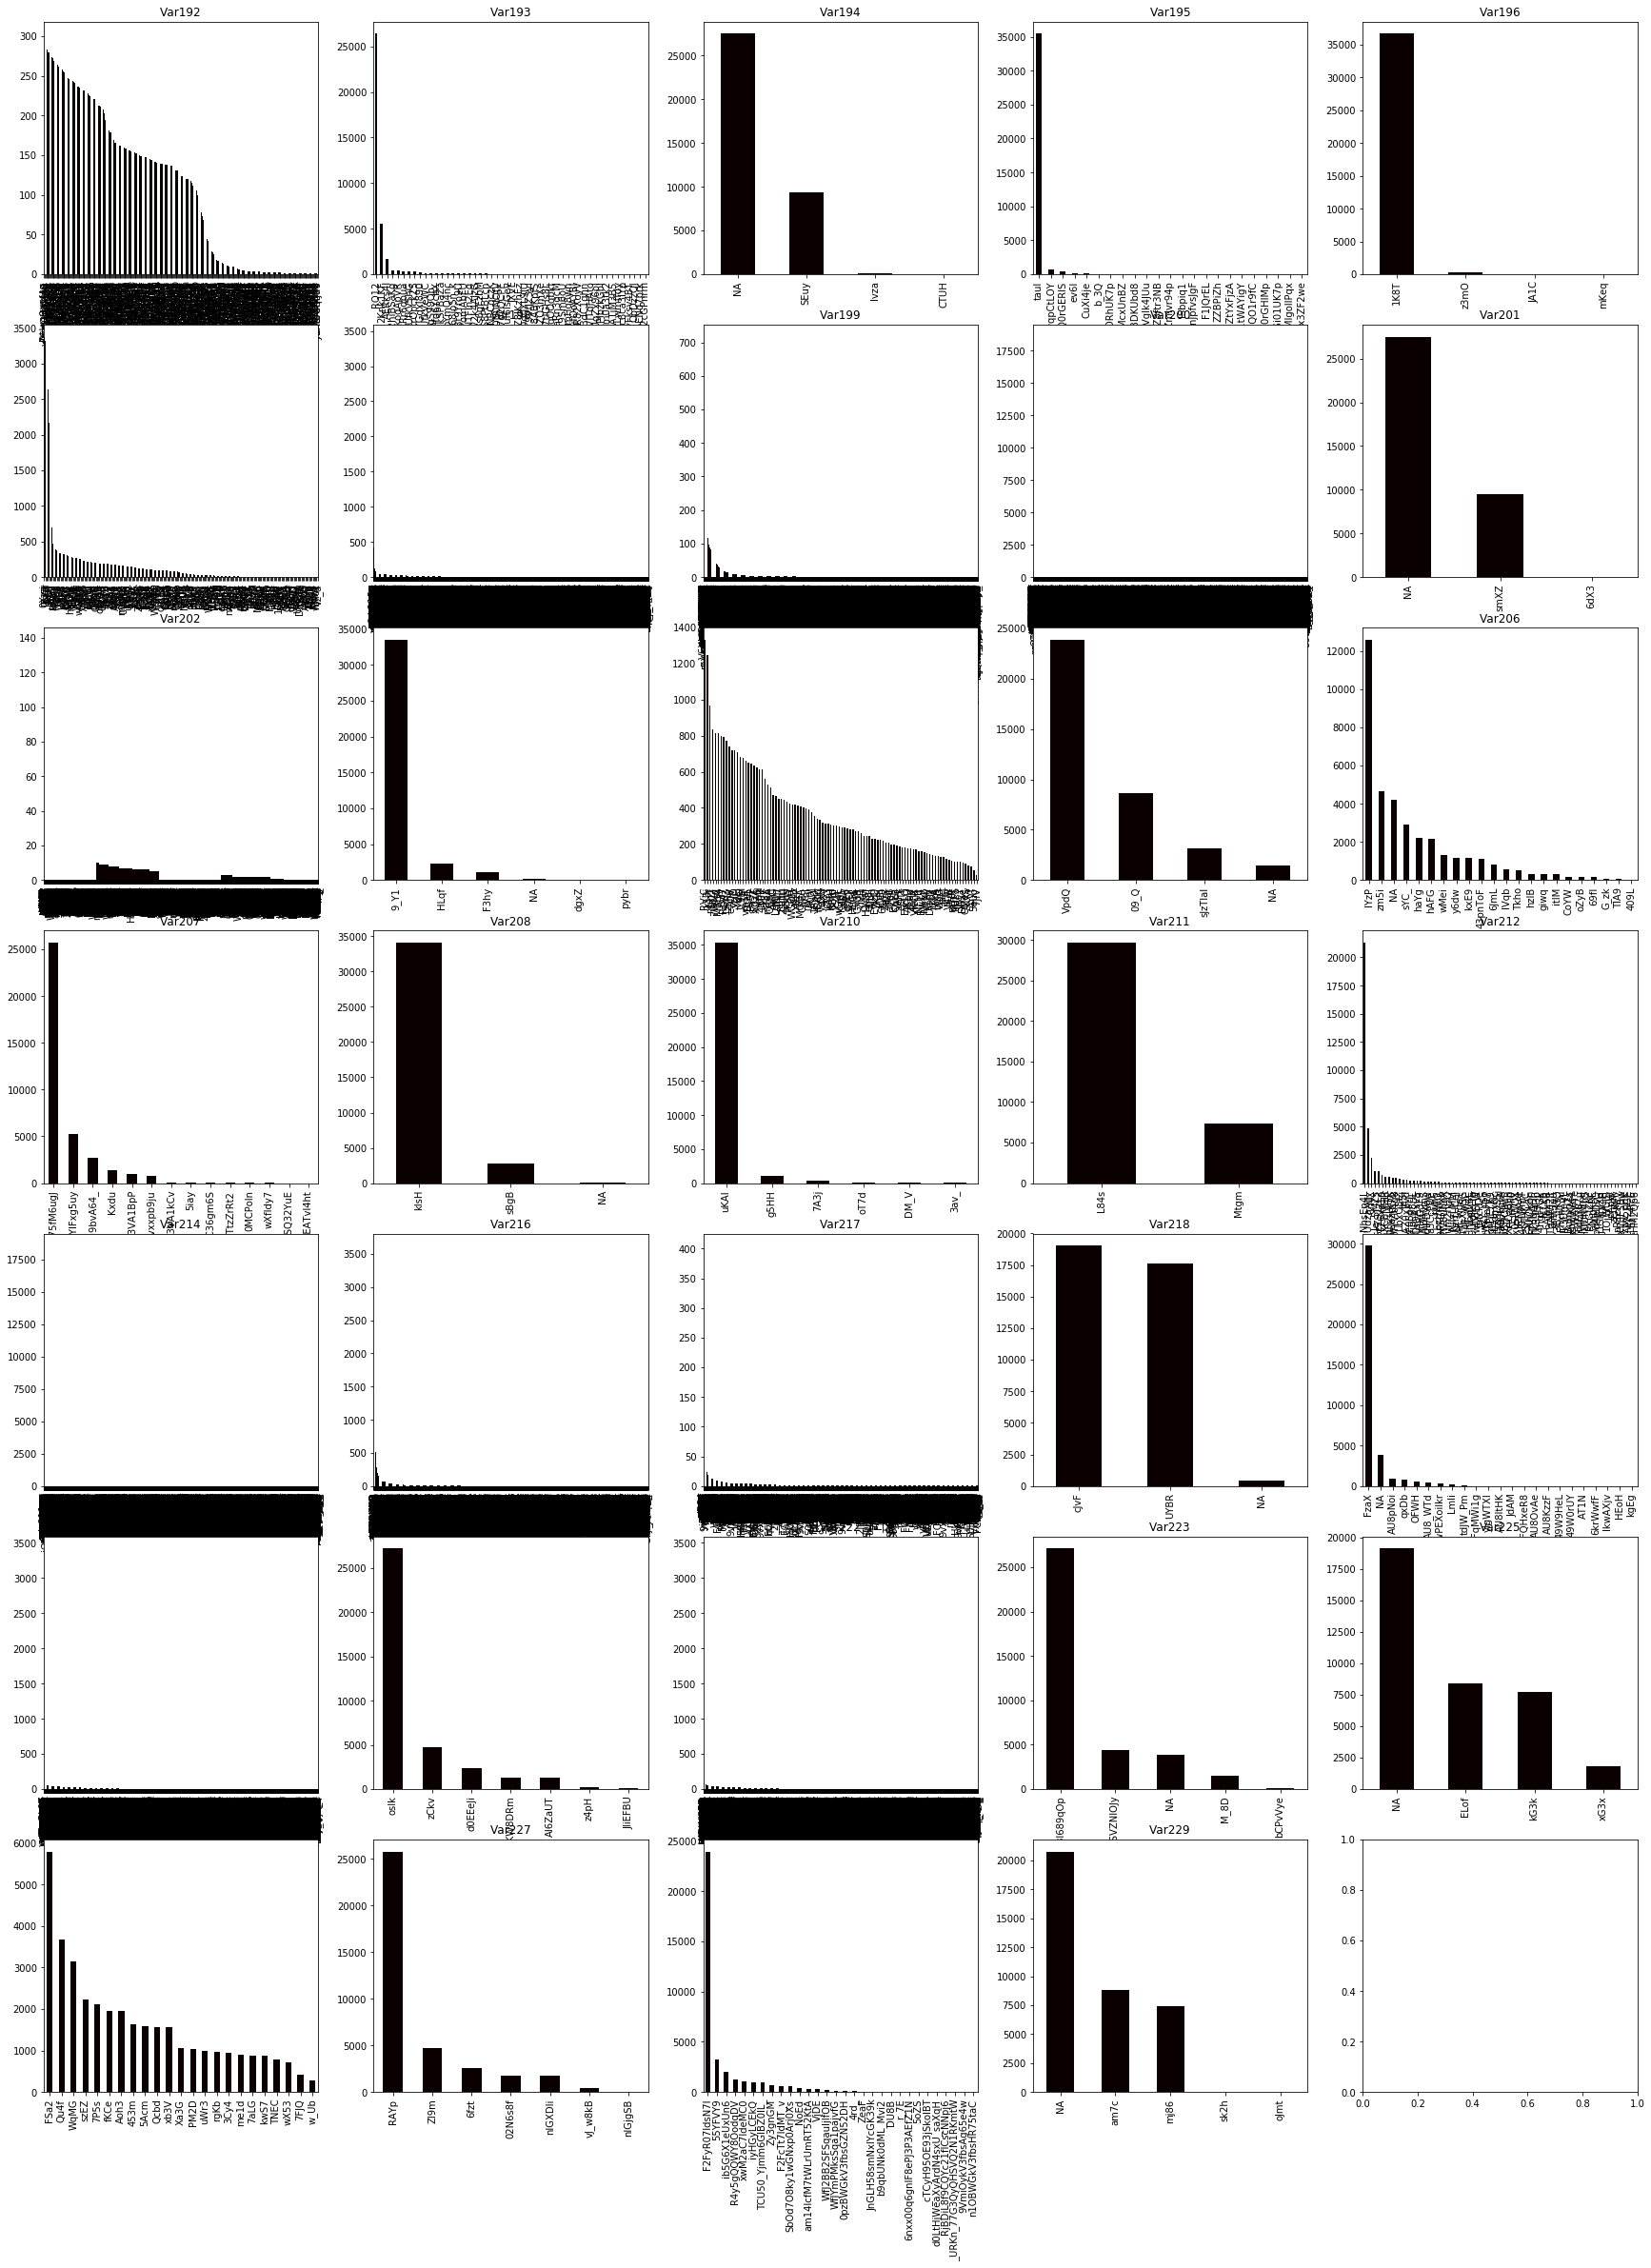

In [18]:
%%time
cat_df = pd.concat((cat_data, labels['churn']), axis=1)
fig, axes = plt.subplots(7, 5, figsize=(30, 40))
for i in range(len(cat_data.columns)):
    ax = axes[i // 5, i % 5]
    #cat_df[cat_df['churn'] == -1][cat_data.columns[i]].value_counts().plot(kind='bar', colormap=None, ax=ax);
    cat_df[cat_df['churn'] == -1][cat_data.columns[i]].value_counts().plot(kind='bar', colormap='hot', ax=ax);
    ax.set_title(cat_data.columns[i])

Wall time: 2min 9s


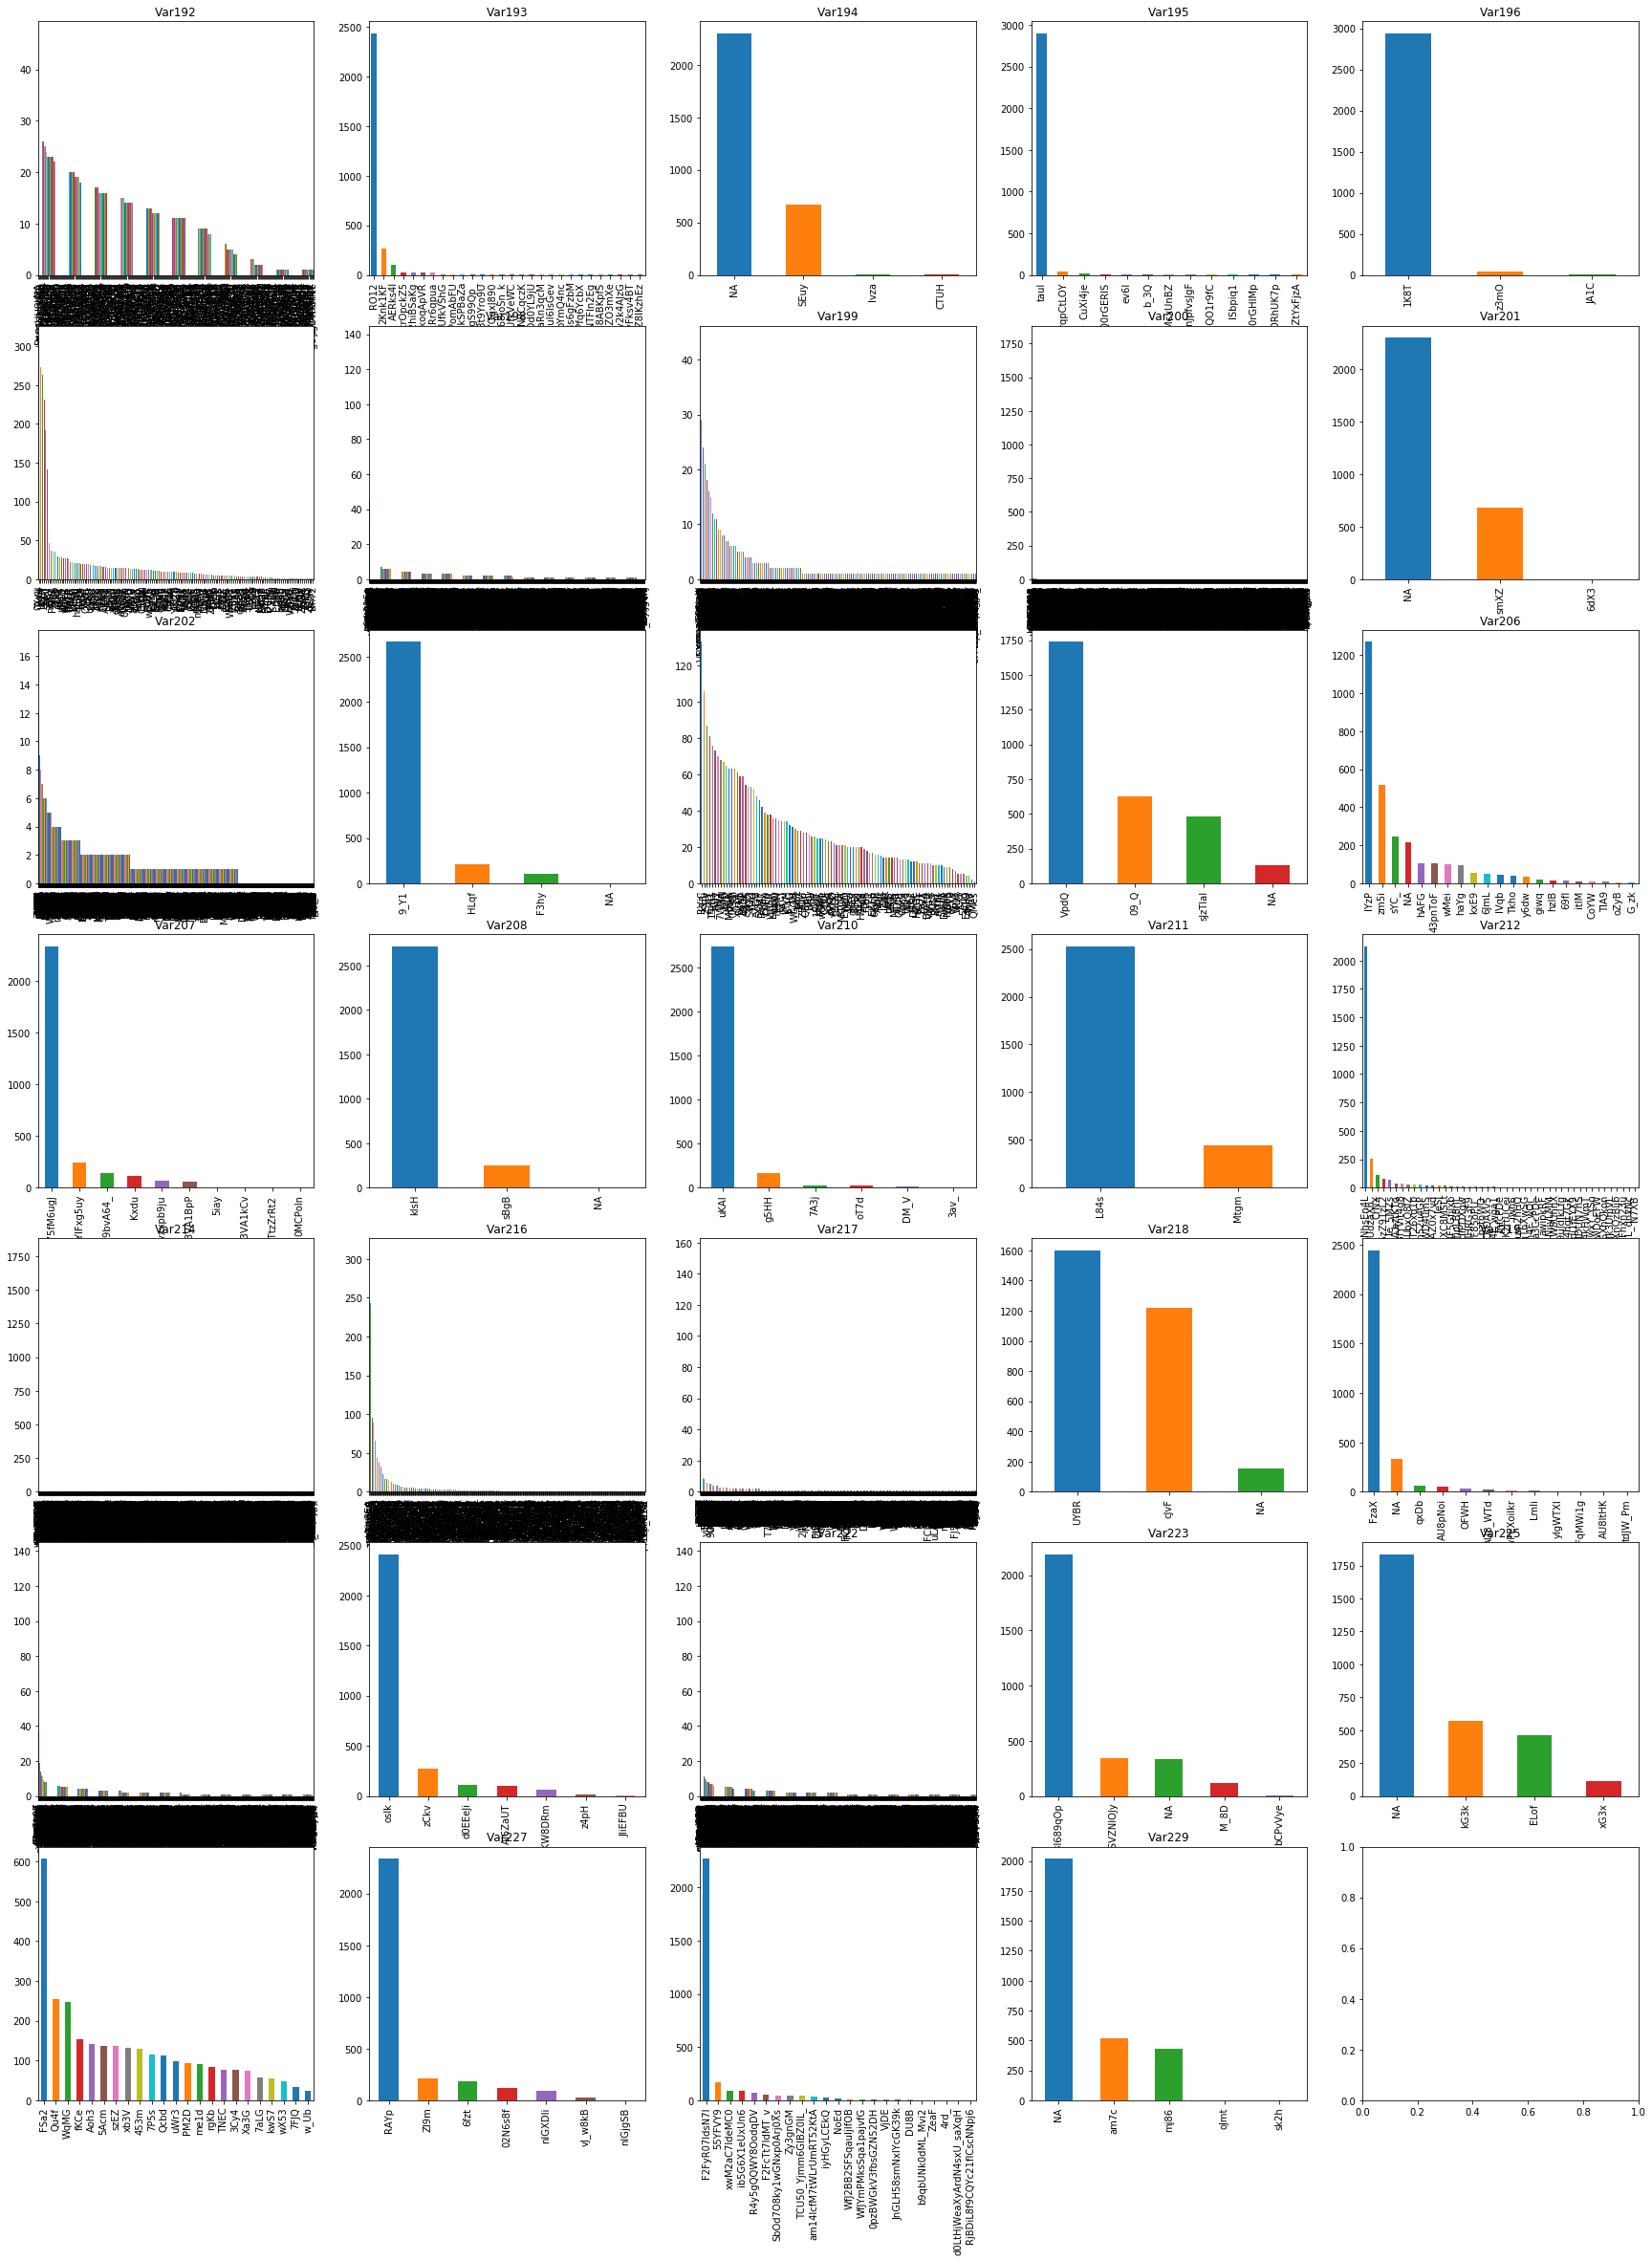

In [19]:
%%time
cat_df = pd.concat((cat_data, labels['churn']), axis=1)
fig, axes = plt.subplots(7, 5, figsize=(30, 40))
for i in range(len(cat_data.columns)):
    ax = axes[i // 5, i % 5]
    cat_df[cat_df['churn'] == 1][cat_data.columns[i]].value_counts().plot(kind='bar', colormap=None, ax=ax);
    #cat_df[cat_df['churn'] == -1][cat_data.columns[i]].value_counts().plot(kind='bar', colormap='hot', ax=ax);
    ax.set_title(cat_data.columns[i])

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

Несколько вещественных признаков (напр. Var21 и Var22) коррелируют между собой. Среди вещественных нормально распределенных признаков нет, есть много бинарных. 

Распределения категориальных признаков с оттоком и без существенно не отличаются.

Похоже, что наибольшее влияние в модель оказывают переменные с наибольшей корреляцией среди вещественных ( Var113, Var153, Var38, Var76, Var149). Среди категориальных не очевидно, какую полезную информацию они вносят.

Шумовые переменные - вещественные со слабой корреляцией, переменные, в которых было много значений NaN, и, возможно, категориальные, но пока рано делать о них однозначный вывод.

Отбор признаков будет весьма полезен - как минимум вручную уже можно удалить половину признаков с NaN, и затем отбор признаков с наибольшей корреляцией поможет построить лучшую модель.